In [3]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [4]:
secret = '1001'   # the secret number

In [5]:
cirk = QuantumCircuit(len(secret)+1, len(secret))

#cirk.h([0, 1, 2, 3, 4, 5]) 
cirk.h(range(len(secret))) # apply Hadamard gate on all qubits except last one
# now to put the last qubit in |-> state 
cirk.x(len(secret))
cirk.h(len(secret))


cirk.barrier()


# now to build the black box containing the secret number, we apply a controlled-X on each '1' that we see in the secret number
for ii, bit in enumerate(reversed(secret)):
    if bit == '1':
        cirk.cx(ii, len(secret))

#cirk.cx(5, 6)
#cirk.cx(2, 6)
#cirk.cx(0, 6)


cirk.barrier()
#cirk.h([0, 1, 2, 3, 4, 5])
cirk.h(range(len(secret)))
cirk.barrier()
# the algorithm is now complete

cirk.measure(range(len(secret)), range(len(secret)))


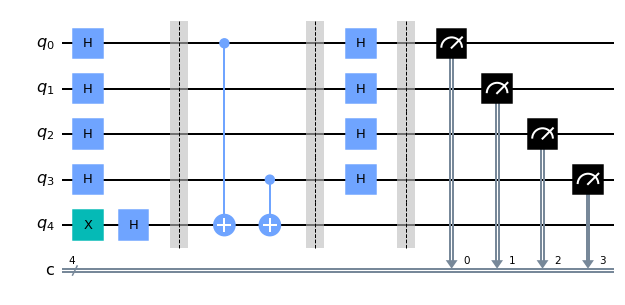

In [6]:
cirk.draw()

In [7]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(cirk, backend=simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1001': 1}


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [8]:
# the above code can find any secret number of any length

In [10]:
# now we will run this on a quantum device
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_lima')
job = execute(cirk, backend=qcomp)

from qiskit.tools.monitor import job_monitor

In [11]:
job_monitor(job)

Job Status: job has successfully run


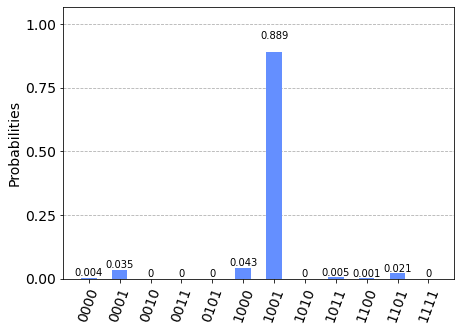

In [13]:
final_result = job.result()
plot_histogram(final_result.get_counts(cirk))